# 0_1_Preproceso_datos_covid

In [1]:
import numpy as np
import pandas as pd

## Preproceso datos de covid

In [2]:
evolucion = pd.read_csv('~/Trabajo_tfm/datos_csv/covid19-provincias-spain_consolidated.csv')

In [4]:
evolucion.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26843 entries, 0 to 26842
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          26843 non-null  object 
 1   province                      26843 non-null  object 
 2   ine_code                      26843 non-null  int64  
 3   ccaa                          26843 non-null  object 
 4   new_cases                     9966 non-null   float64
 5   PCR                           7451 non-null   float64
 6   TestAc                        957 non-null    float64
 7   activos                       3418 non-null   float64
 8   hospitalized                  19756 non-null  float64
 9   hospitalized_accumulated      2162 non-null   float64
 10  hospitalized_new              2086 non-null   float64
 11  intensive_care                19981 non-null  float64
 12  deceased                      21779 non-null  float64
 13  c

In [5]:
#print(f"Conteo de ocurrencias por valor: {evolucion['num_casos'].value_counts()}")
print (" Numero de registros con valor nulo :",evolucion[evolucion['num_casos'].isnull()].shape[0] )

 Numero de registros con valor nulo : 6511


In [6]:
#print(f"Conteo de ocurrencias por valor: {evolucion['num_casos2'].value_counts()}")
print (" Numero de registros con valor nulo :",evolucion[evolucion['num_casos2'].isnull()].shape[0] )

 Numero de registros con valor nulo : 167


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")  #sns.set(style="white") # #sns.set(style="darkgrid") 
#import lux

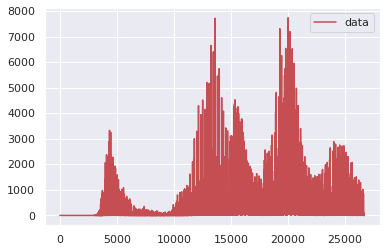

In [8]:
xx = np.stack([i for i in range(evolucion['date'].shape[0])])

plt.plot(xx, evolucion['num_casos2'], c='r', label='data')

plt.legend()
#plt.title("RandomForests Regressors (estimators = %i, MAE = %6.2f')" % (best_est, mae))

plt.show()

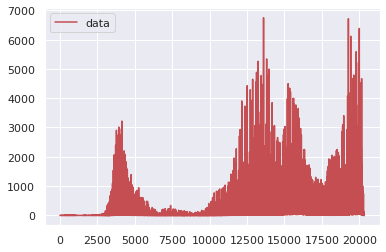

In [9]:
xx = np.stack([i for i in range(evolucion['num_casos'].shape[0])])

plt.plot(xx, evolucion['num_casos'], c='r', label='data')

plt.legend()
#plt.title("RandomForests Regressors (estimators = %i, MAE = %6.2f')" % (best_est, mae))

plt.show()

In [10]:
evolucion[evolucion['num_casos2'].isnull()].date.unique()

array(['2021-05-28', '2021-05-29', '2021-05-30', '2021-05-31'],
      dtype=object)

In [11]:
evolucion[evolucion['num_casos'].isnull()].date.unique()

array(['2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
       '2021-01-30', '2021-01-31', '2021-02-01', '2021-02-02',
       '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-06',
       '2021-02-07', '2021-02-08', '2021-02-09', '2021-02-10',
       '2021-02-11', '2021-02-12', '2021-02-13', '2021-02-14',
       '2021-02-15', '2021-02-16', '2021-02-17', '2021-02-18',
       '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22',
       '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
       '2021-02-27', '2021-02-28', '2021-03-01', '2021-03-02',
       '2021-03-03', '2021-03-04', '2021-03-05', '2021-03-06',
       '2021-03-07', '2021-03-08', '2021-03-09', '2021-03-10',
       '2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14',
       '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
       '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
       '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
       '2021-03-27', '2021-03-28', '2021-03-29', '2021-

- **Decision**
    cols_eliminar = [ .....]

    #evolucion = evolucion.drop(columns=cols_eliminar)

In [12]:
no_necesarias = [
    'ine_code','ccaa', 'new_cases', 'PCR', 'TestAc', 'activos', 'hospitalized', 'hospitalized_accumulated',
    'hospitalized_new', 'intensive_care', 'deceased', 'cases_accumulated', 'cases_accumulated_PCR', 
    'recovered', 'deceased_hosp_eus', 'num_casos_prueba_pcr', 'num_casos_prueba_test_ac','num_casos_prueba_ag',
    'num_casos_prueba_elisa', 'num_casos_prueba_desconocida', 'num_hosp', 'num_uci', 'num_def', 'num_casos_cum2',
    'num_hosp_cum','num_uci_cum', 'num_def_cum', 'cases_per_cienmil', 'intensive_care_per_1000000',
    'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days', 'cases_7days', 'cases_PCR_14days',
    'cases_PCR_7days', 'daily_cases', 'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7','daily_deaths',
    'daily_deaths_hosp_eus', 'daily_deaths_inc','daily_deaths_avg3', 'daily_deaths_avg7',
    'daily_deaths_avg7_hosp_eus', 'num_casos_avg7', 'num_casos_prueba_pcr_avg7', 'num_casos2_avg7','ia14',
    'source_name', 'source', 'comments']
evolucion.drop(columns = no_necesarias, axis = 1, inplace = True)

## Filtro por fechas 

In [13]:
def funcion_inversion_fecha (fecha) :
    AA = fecha[:4]
    MM = fecha[5:7]
    dd = fecha[8:10]
    fecha_d = AA + MM + dd
    return fecha_d

In [14]:
def funcion_fecha (fecha) :
    fecha_dia = fecha [-8:]
    AA = fecha_dia[:4]
    MM = fecha_dia[4:6]
    dd = fecha_dia[6:8]
    fecha_d = AA +'-' + MM +'-' + dd
    return fecha_d

In [15]:
datos_fechas = pd.read_csv("~/Trabajo_tfm/datos_csv/jaen_meteo.csv") # cualquiera, leer solo la fecha!!

In [16]:
dates = datos_fechas.fecha 

In [17]:
rango_fechas = np.arange(dates.size)
fechas =[]
for dia in rango_fechas :
    fecha = funcion_inversion_fecha (dates[dia])
    fechas.append(fecha)

In [18]:
fechas_ =[]
for fecha in fechas : 
    fechas_.append(funcion_fecha(fecha))

In [19]:
evolucion = evolucion[evolucion.date.isin(fechas_)]

In [20]:
evolucion.shape

(17524, 7)

## Filtro por provincias                       

In [21]:
evolucion.province.unique()

array(['Albacete', 'Alicante/Alacant', 'Almería', 'Araba/Álava',
       'Asturias', 'Ávila', 'Badajoz', 'Balears, Illes', 'Barcelona',
       'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria',
       'Castellón/Castelló', 'Ceuta', 'Ciudad Real', 'Córdoba',
       'Coruña, A', 'Cuenca', 'Gipuzkoa', 'Girona', 'Granada',
       'Guadalajara', 'Huelva', 'Huesca', 'Jaén', 'León', 'Lleida',
       'Lugo', 'Madrid', 'Málaga', 'Melilla', 'Murcia', 'Navarra',
       'Ourense', 'Palencia', 'Palmas, Las', 'Pontevedra', 'Rioja, La',
       'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
       'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia/València',
       'Valladolid', 'Zamora', 'Zaragoza'], dtype=object)

In [22]:
provincias = ['Alicante/Alacant','Badajoz','Ciudad Real', 'Madrid', 'Palencia','Salamanca',
              'Jaén','Córdoba','Sevilla','Huelva','Cádiz','Málaga','Granada','Almería','Coruña, A','Lugo',
              'Ourense','Pontevedra','Valencia/València','Zamora', 'Zaragoza'] # provincias de estudio

In [23]:
evolucion = evolucion[evolucion.province.isin(provincias)] # filtro por provincias

In [24]:
evolucion.shape

(7077, 7)

- Formateo de provincia a mayusculas                      

In [25]:
def nombre_provincia(row): # transfoma la provincia a mayusculas para unificar con otros ficheros
    if row.province == 'Alicante/Alacant':
        return 'alicante'.upper()
    elif row.province == 'Badajoz':
        return 'Badajoz'.upper()
    elif row.province == 'Ciudad Real':
        return 'Ciudad_Real'.upper()
    elif row.province == 'Madrid':
        return 'Madrid'.upper()
    elif row.province == 'Palencia':
        return 'Palencia'.upper()
    elif row.province == 'Salamanca':
        return 'Salamanca'.upper()
    elif row.province == 'Valencia/València':
        return 'Valencia'.upper()  
    elif row.province == 'Zamora':
        return 'Zamora'.upper()  
    elif row.province == 'Zaragoza':
        return 'Zaragoza'.upper()  
    elif row.province == 'Jaén':
        return 'jaen'.upper()
    elif row.province == 'Córdoba':
        return 'cordoba'.upper()
    elif row.province == 'Cádiz':
        return 'Cadiz'.upper()
    elif row.province == 'Sevilla':
        return 'sevilla'.upper()
    elif row.province == 'Granada':
        return 'Granada'.upper()
    elif row.province == 'Huelva':
        return 'huelva'.upper()
    elif row.province == 'Málaga':
        return 'malaga'.upper()
    elif row.province == 'Almería':
        return 'almeria'.upper()
    elif row.province == 'Coruña, A':
        return 'Coruña'.upper()
    elif row.province == 'Lugo':
        return 'lugo'.upper()
    elif row.province == 'Ourense':
        return 'Orense'.upper()
    elif row.province == 'Pontevedra':
        return 'Pontevedra'.upper()

In [26]:
provincia = evolucion.apply(lambda row: nombre_provincia(row), axis=1).rename('provincia')

In [27]:
evolucion = evolucion.drop(columns='province')

In [28]:
evolucion.insert(1,'provincia', provincia)# evolucion.head()

In [29]:
evolucion.keys()

Index(['date', 'provincia', 'num_casos', 'num_casos_cum1', 'num_casos2',
       'poblacion', 'deaths_last_week'],
      dtype='object')

In [30]:
evolucion_casos = pd.concat([ # construccion
    evolucion[evolucion.provincia =='ALICANTE'],
    evolucion[evolucion.provincia =='BADAJOZ'],
    evolucion[evolucion.provincia =='CIUDAD_REAL'],
    evolucion[evolucion.provincia =='MADRID'],
    evolucion[evolucion.provincia =='PALENCIA'],
    evolucion[evolucion.provincia =='SALAMANCA'],
    evolucion[evolucion.provincia =='VALENCIA'],
    evolucion[evolucion.provincia =='ZAMORA'],
    evolucion[evolucion.provincia =='ZARAGOZA'],
    evolucion[evolucion.provincia =='JAEN'], # ordenacion por provincias
    evolucion[evolucion.provincia =='CORDOBA'],
    evolucion[evolucion.provincia =='SEVILLA'],
    evolucion[evolucion.provincia =='HUELVA'],
    evolucion[evolucion.provincia =='CADIZ'],
    evolucion[evolucion.provincia =='MALAGA'],
    evolucion[evolucion.provincia =='GRANADA'],
    evolucion[evolucion.provincia =='ALMERIA'],
    evolucion[evolucion.provincia =='CORUÑA'],
    evolucion[evolucion.provincia =='LUGO'],
    evolucion[evolucion.provincia =='ORENSE'],
    evolucion[evolucion.provincia =='PONTEVEDRA']])

In [31]:
evolucion_casos.head(3)

,date,provincia,num_casos,num_casos_cum1,num_casos2,poblacion,deaths_last_week
3121,2020-03-01,ALICANTE,14.0,69.0,0.0,1858683,0
3173,2020-03-02,ALICANTE,16.0,85.0,5.0,1858683,0
3225,2020-03-03,ALICANTE,10.0,95.0,1.0,1858683,0


## Cambio de nombre de date a fecha

In [32]:
evolucion_casos = evolucion_casos.rename({"date": "fecha"}, axis="columns")

In [33]:
evolucion_casos = evolucion_casos.reset_index()

In [34]:
evolucion_casos.provincia.unique()

array(['ALICANTE', 'BADAJOZ', 'CIUDAD_REAL', 'MADRID', 'PALENCIA',
       'SALAMANCA', 'VALENCIA', 'ZAMORA', 'ZARAGOZA', 'JAEN', 'CORDOBA',
       'SEVILLA', 'HUELVA', 'CADIZ', 'MALAGA', 'GRANADA', 'ALMERIA',
       'CORUÑA', 'LUGO', 'ORENSE', 'PONTEVEDRA'], dtype=object)

In [35]:
evolucion_casos.drop('index', inplace=True, axis=1)

In [36]:
evolucion_casos.tail(3)

,fecha,provincia,num_casos,num_casos_cum1,num_casos2,poblacion,deaths_last_week
7074,2021-01-29,PONTEVEDRA,NaN,NaN,529.0,942665,34
7075,2021-01-30,PONTEVEDRA,NaN,NaN,359.0,942665,30
7076,2021-01-31,PONTEVEDRA,NaN,NaN,339.0,942665,30


In [37]:
evolucion_casos.drop('num_casos', inplace=True, axis=1)
evolucion_casos.drop('num_casos_cum1', inplace=True, axis=1)
evolucion_casos.drop('deaths_last_week', inplace=True, axis=1)

In [38]:
evolucion_casos = evolucion_casos.rename({"num_casos2": "num_casos"}, axis="columns")

In [39]:
evolucion_casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077 entries, 0 to 7076
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      7077 non-null   object 
 1   provincia  7077 non-null   object 
 2   num_casos  7077 non-null   float64
 3   poblacion  7077 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 221.3+ KB


In [40]:
evolucion_casos.tail()

,fecha,provincia,num_casos,poblacion
7072,2021-01-27,PONTEVEDRA,498.0,942665
7073,2021-01-28,PONTEVEDRA,576.0,942665
7074,2021-01-29,PONTEVEDRA,529.0,942665
7075,2021-01-30,PONTEVEDRA,359.0,942665
7076,2021-01-31,PONTEVEDRA,339.0,942665


In [41]:
evolucion_casos.to_csv("~/Trabajo_tfm/datos_csv/covid_preprocesado.csv")